## Relativistic Ballet
* Explore how relative motion alters measurements of the spatial dimensions of material objects, the paths of particles and photons through spacetime and the distribution of electric and magnetic force lines.
* Discover why photons are forward beamed by relativistic motion.
* Investigate the fishbowl effect for a rocket ship pilot.
* Identify relativistic effects observed in astrophysical jets produced by black holes.

芭蕾舞者在舞台以速度 $\beta$ 移動，抬腿仰角 $\phi'$，觀眾看到的仰角 $\phi$，關係式為
$$\tan \phi=\gamma\tan\phi'$$
也就是說，觀眾看到的抬腿仰角比實際的大。

In [1]:
# 芭蕾舞者實際抬腿20度，觀眾看到45度，問舞者的速度？
import numpy as np
def gamma2beta(gamma):
    return np.sqrt(1-1/gamma**2)
phiprime=20*np.pi/180
phi=45*np.pi/180
gamma=np.tan(phi)/np.tan(phiprime)
print(gamma2beta(gamma))
# 產生電場的電子以速度 beta 快速移動，電力線方向由45度(電子座標)變成51.3度(實驗室座標)，問 beta 是多少？
a=51.3*np.pi/180
print(gamma2beta(np.tan(a)))

0.931410580017
0.598462164337


## 不同座標系統下的質點速度
* 在S系統中，S' 系統以速率$\beta$沿$X$軸正向移動。

* 在S'系統中，一質點由原點出發，以方向角 $\phi'$ 速率 $v'$ 的方式運動。

* 在S系統中，該質點的方向角為何？

$$ 
\left(\begin{array}{c}
      \Delta t \\
      \Delta x \\
      \Delta y \end{array}\right)
=\left(\begin{array}{ccc}
      \gamma & \gamma\beta &0\\
      \gamma\beta&\gamma&0 \\
      0&0&1 \end{array}\right)
\left(\begin{array}{c}
      \Delta t' \\
      \Delta x' \\
      \Delta y' \end{array}\right)
=\left(\begin{array}{ccc}
      \gamma & \gamma\beta &0\\
      \gamma\beta&\gamma&0 \\
      0&0&1 \end{array}\right)
\left(\begin{array}{c}
      \Delta t' \\
      v'\cos\phi' \Delta t'\\
      v'\sin\phi' \Delta t' \end{array}\right)$$
因為　$v_x=\frac{\Delta x}{\Delta t}=\frac{\gamma\beta+\gamma v'cos\phi'}{\gamma+\gamma\beta v' \cos\phi'}
    =\frac{\beta+v'\cos\phi'}{1+\beta v'\cos\phi'}$,
$v_y=\frac{\Delta y}{\Delta t}=\frac{v'\sin\phi'}{\gamma+\gamma\beta v' \cos\phi'}$，所以
$$ \tan\phi=\frac{v'\sin\phi'}{\gamma(\beta+v'\cos\phi')}$$   
$$ \tan\phi'=\frac{v\sin\phi}{\gamma(-\beta+v\cos\phi)}$$   



In [2]:
# 男芭蕾舞者以 0.25 的速度移動，以 60 度的角度 0.5 速率舉起女舞者，觀眾看到的舉起角度為若干？
vprime=0.5
beta=0.25
def beta2gamma(beta):
    return 1/np.sqrt(1-beta**2)
phiprime=np.pi/3
num=vprime*np.sin(phiprime)
den=beta2gamma(beta)*(beta+vprime*np.cos(phiprime))
print(np.arctan(num/den)*180/np.pi)
# 男芭蕾舞者以 0.25 的速度移動，觀眾看到他以 0.25 的速率垂直舉起女舞者，他實際上以甚麼角度舉起？
print(180+np.arctan(0.25/(beta2gamma(beta)*(-beta)))*180/np.pi)

39.9806905075
135.924285823


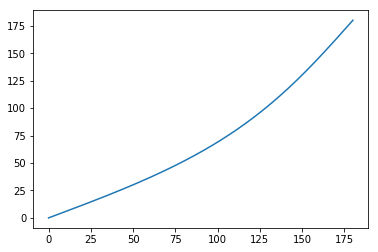

60.0


In [11]:
import numpy as np
def beta2gamma(beta):
    return np.sqrt(1/(1-beta*beta))
def phiprime2phi(beta,vprime,phiprime):
    gamma=beta2gamma(beta)
    u=np.arctan2(vprime*np.sin(phiprime),gamma*(beta+vprime*np.cos(phiprime)))
    return u
import matplotlib.pyplot as plt
phiprime = np.linspace(0, 180, 181)
beta=0.5
vprime=1
phi=[phiprime2phi(beta,vprime,p*np.pi/180)*180/np.pi for p in phiprime]
plt.plot(phiprime,phi)
plt.show()
print(phi[90])

## Headlight Beaming Effect
## Headlight Doppler Shift
光到觀察者的方向與與光源前進的方向夾角為$\phi$，光源的頻率$f^\prime$，光源的速度$\beta$，觀察者看到的頻率$f$。

架座標

S' 相對於 S 往X軸正向以$\beta$速度移動，t=t'=0的時候，光源P在共同的原點，觀察者Q在t=0時候的的座標$Q_S=(0,r\cos \phi,r\sin\phi)$。
在S'系統， $t'=0$ 的時侯，光源往觀察者發光的方向為 $\phi^\prime$，$\phi^\prime$與$\phi$間的關係為
$$\cos\phi^\prime=\frac{\cos\phi-\beta}{1-\beta\cos\phi}, \sin\phi^\prime=\frac{\sin\phi}{\gamma(1-\beta\cos\phi)}$$
$$ \tan\phi'=\frac{\sin\phi}{\gamma(\cos\phi-\beta)}$$   


P往Q傳送光波，第$n$個波峰在P與Q間的事件$E_n$滿足

$$n=2\pi f\cdot((x,y)\cdot (\cos \phi,\sin\phi)-t)= 2\pi f^\prime\cdot((x^\prime,y^\prime)\cdot (\cos \phi^\prime,\sin\phi^\prime)-t^\prime)$$

因此，$$\begin{equation*}f(x\cos\phi+y\sin\phi-t)=f^\prime(x^\prime\cos\phi^\prime+y^\prime\sin\phi^\prime-t^\prime)\end{equation*}$$

利用L.T.， $$\begin{equation*}\begin{array}{rcl}
x^\prime\cos\phi^\prime+y^\prime\sin\phi^\prime-t^\prime&=&(\gamma x-\gamma\beta t)\frac{\cos\phi-\beta}{1-\beta\cos\phi}+y\frac{\sin\phi}{\gamma(1-\beta\cos\phi)}-(\gamma t-\gamma \beta x)\\
&=& x(\frac{\gamma(\cos\phi-\beta)+\gamma\beta(1-\beta\cos\phi)}{1-\beta\cos\phi})+y(\frac{\sin\phi}{\gamma(1-\beta\cos\phi)})-t(\gamma+\gamma\beta\frac{\cos\phi-\beta}{1-\beta\cos\phi})\\
&=&x\frac{\gamma^2(\cos\phi)(1-\beta^2)}{\gamma(1-\beta\cos\phi)}+y(\frac{\sin\phi}{\gamma(1-\beta\cos\phi)})-t(\frac{1}{\gamma(1-\beta\cos\phi)})\\
&=&\frac{x\cos\phi+y\sin\phi-t}{\gamma(1-\beta\cos\phi)}
\end{array}\end{equation*}$$

合併最後兩個式子，得到
$$f^\prime=f\gamma(1-\beta\cos\phi)$$

## PHASE VELOCITY AND THE TRANSFER OF INFORMATION

## 摘要
* Lorentz transformations permit one to calculate how spatial dimensions of material objects, particle and photon paths through spacetime, and lines of force are transformed by motion.
* Lorentz transformations provide a unified description of angle changes and beaming (the same effect as abberation, originally studied by astronomers) and Doppler shifts for light.
* Rocket ship pilots see blue shifted stars concentrated in their direction of motion through the galaxy; radiation from moving, isotropically emitting gas is beamed in the direction of motion.
* Relativistic astrophysical jets produced by black holes demonstrate many key relativistic effects.

合併$\ref{a:1},\ref{a:2}$得到
$$f^\prime=f\gamma(1-\beta\cos\phi)$$